# Runge-Kutta methods for ODE integration in Python

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import odeint  # for comparison

I will use as a first example the one included in [the scipy documentation for this `odeint` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

$$\theta''(t) + b \theta'(t) + c (\theta(t)) = 0.$$

If $\omega(t) = \theta'(t)$, this gives
$$ \begin{cases}
\theta'(t) = \omega(t) \\
\omega'(t) = -b \omega(t) - c (\theta(t))
\end{cases} $$

Vectorially, if $y(t) = [\theta(t), \omega(t)]$, then the equation is $y' = f(t, y)$ where $f(t, y) = [y_2(t), -b y_2(t) - c (y_1(t))]$.

In [4]:
def pend(y, t, b, c): # define functions which give the dy[0]/dt and dy[1]/dt
    return np.array([y[1], -b*y[1] - c*(y[0])]) # return [derivitive of position vs time, derivitive of velocity vs time]

We assume the values of $b$ and $c$ to be known, and the starting point to be also fixed:

In [5]:
b = 0.1 # air resistance (units?)
c = 1.0 # gravity strength (kg m/s^2)
initpos = 0.5
initv = 0
y_init = np.array([initpos, initv]) # initial position and velocity (theta and omega)

The `odeint` function will be used to solve this ODE on the interval $t \in [0, 10]$, with $101$ points.

In [6]:
t = np.linspace(0, 100, 1001) # 0 to 100 seconds, 1000 points along the way, 0.01s each
cost = initpos*np.cos(t)
print(t)

[  0.    0.1   0.2 ...  99.8  99.9 100. ]


It is used like this, and our implementations will follow this signature.

In [7]:
solsin = odeint(pend, y_init, t, args=(b, c),full_output=0,atol=1e-14,rtol=1e-14) # can specify the accuracy that you are requiring for the solution
print("solsin",solsin)
posis=solsin[:,0] #all the positions
velis=solsin[:,1] #all the velocities
print("posistion",posis)
print("velocities",velis)
#print(info["nst"][4])

solsin [[ 0.5         0.        ]
 [ 0.49751039 -0.04966795]
 [ 0.49009936 -0.09834791]
 ...
 [ 0.00210233  0.00257267]
 [ 0.00234742  0.00232546]
 [ 0.00256674  0.0020576 ]]
posistion [0.5        0.49751039 0.49009936 ... 0.00210233 0.00234742 0.00256674]
velocities [ 0.         -0.04966795 -0.09834791 ...  0.00257267  0.00232546
  0.0020576 ]


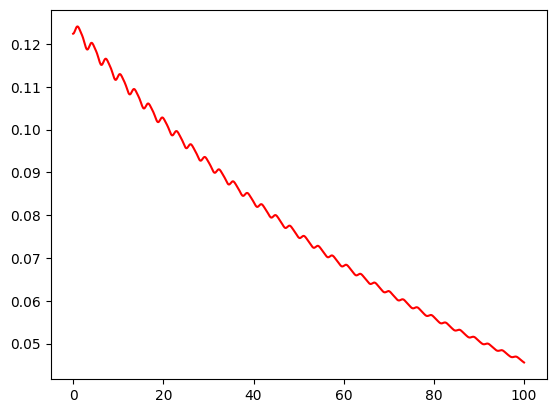

In [ ]:
#plots energy vs time
plt.plot(t, 0.5*solsin[:,1]*solsin[:,1]+c*(1.0-np.cos(solsin[:,0])), 'r', label=r'energy')

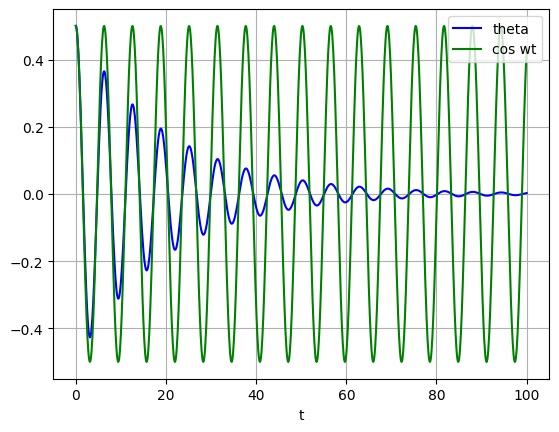

In [8]:
plt.plot(t, posis, 'b', label=r'theta') #pos vs time
#plt.plot(t, velis, 'b', label=r'omega')
plt.plot(t, cost, 'g', label=r'cos wt') #analytical sol for no friction
#plt.plot(t, solsin[:, 0] - cost, 'r', label=r'theta - cos wt') #pos vs time
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

----
## Runge-Kutta method of order 1, or the Euler method

The approximation is computed using this update:
$$y_{n+1} = y_n + (t_{n+1} - t_n) f(y_n, t_n).$$

The math behind this formula are the following: if $g$ is a solution to the ODE, and so far the approximation is correct, $y_n \simeq g(t_n)$, then a small step $h = t_{n+1} - t_n$ satisfy $g(t_n + h) \simeq g(t_n) + h g'(t_n) \simeq y_n + h f(g(t_n), t_n) + \simeq y_n + h f(y_n, t_n)$.

In [9]:
def rungekutta1(f, y0, t, args=()): # replaces our odeint function from above
    n = len(t) # number of time steps
    y = np.zeros((n, len(y0))) #initialize arrays for results
    y[0] = y0 # set starting conditions
    for i in range(n - 1): # for each time step
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y

In [10]:
sole = rungekutta1(pend, y_init, t, args=(b, c))

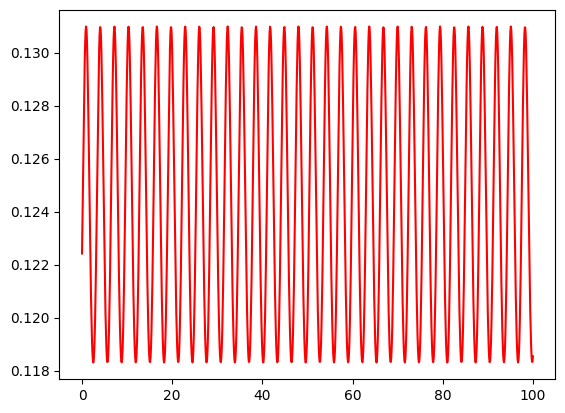

In [11]:
#plots energy vs time
plt.plot(t, 0.5*sole[:,1]*sole[:,1]+c*(1.0-np.cos(sole[:,0])), 'r', label=r'energy')

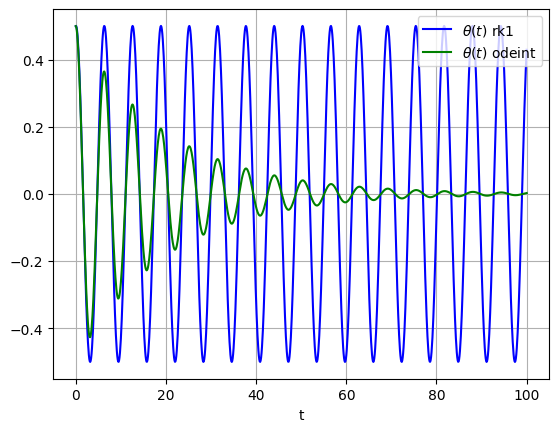

In [12]:
plt.plot(t, sole[:, 0], 'b', label=r'$\theta(t)$ rk1')
#plt.plot(t, sole[:, 1], 'g', label=r'$\omega(t)$')
plt.plot(t, solsin[:, 0], 'g', label=r'$\theta(t)$ odeint')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

With the same number of points, the Euler method (*i.e.* the Runge-Kutta method of order 1) is less precise than the reference `odeint` method. With more points, it can give a satisfactory approximation of the solution:

In [13]:
t2 = np.linspace(0, 10, 1001)
sole2 = rungekutta1(pend, y_init, t2, args=(b, c))

In [14]:
t3 = np.linspace(0, 10, 10001)
sole3 = rungekutta1(pend, y_init, t3, args=(b, c))

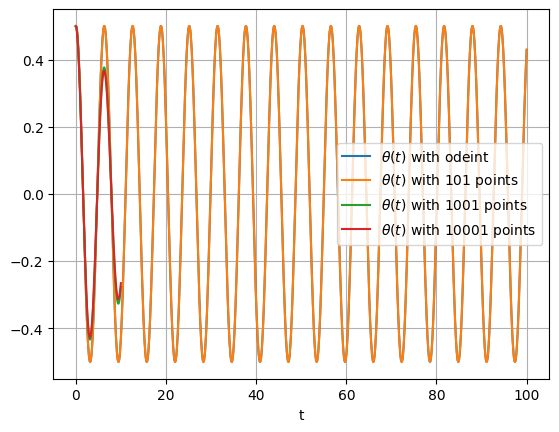

In [17]:
plt.plot(t, sole[:, 0], label=r'$\theta(t)$ with odeint')
plt.plot(t, sole[:, 0], label=r'$\theta(t)$ with 101 points')
plt.plot(t2, sole2[:, 0], label=r'$\theta(t)$ with 1001 points')
plt.plot(t3, sole3[:, 0], label=r'$\theta(t)$ with 10001 points')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

----
## Runge-Kutta method of order 2

The order 2 Runge-Method uses this update:
$$ y_{n+1} = y_n + h f(t + \frac{h}{2}, y_n + \frac{h}{2} f(t, y_n)),$$
if $h = t_{n+1} - t_n$.

In [20]:
def rungekutta2(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i], *args) * h / 2., t[i] + h / 2., *args)
    return y

For our simple ODE example, this method is already quite efficient.

In [21]:
t4 = np.linspace(0, 50, 21)
sol4 = rungekutta2(pend, y_init, t4, args=(b, c))

In [22]:
sol = rungekutta2(pend, y_init, t, args=(b, c))

In [23]:
t2 = np.linspace(0, 50, 1001)
sol2 = rungekutta2(pend, y_init, t2, args=(b, c))

In [24]:
t3 = np.linspace(0, 50, 10001)
sol3 = rungekutta2(pend, y_init, t3, args=(b, c))

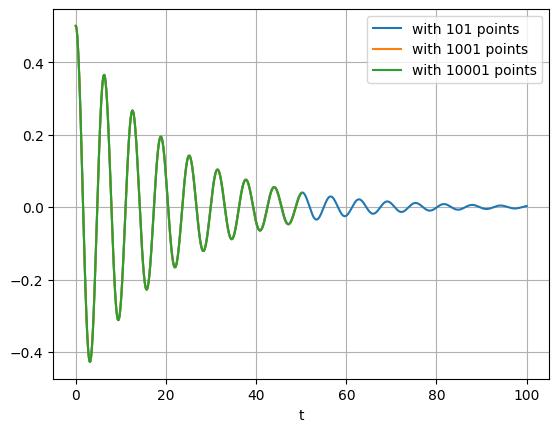

In [25]:
#plt.plot(t4, sol4[:, 0], label='with 21 points')
plt.plot(t, sol[:, 0], label='with 101 points')
plt.plot(t2, sol2[:, 0], label='with 1001 points')
plt.plot(t3, sol3[:, 0], label='with 10001 points')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

----
## Runge-Kutta method of order 4, *"RK4"*

The order 4 Runge-Method uses this update:
$$ y_{n+1} = y_n + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4),$$
if $h = t_{n+1} - t_n$, and
$$\begin{cases}
k_1 &= f(y_n, t_n), \\
k_2 &= f(y_n + \frac{h}{2} k_1, t_n + \frac{h}{2}), \\
k_3 &= f(y_n + \frac{h}{2} k_2, t_n + \frac{h}{2}), \\
k_4 &= f(y_n + h k_3, t_n + h).
\end{cases}$$

In [26]:
def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

For our simple ODE example, this method is even more efficient.

In [27]:
t4 = np.linspace(0, 10, 21)
sol4 = rungekutta4(pend, y_init, t4, args=(b, c))

In [28]:
t = np.linspace(0, 10, 101)
sol = rungekutta4(pend, y_init, t, args=(b, c))

In [29]:
t2 = np.linspace(0, 10, 1001)
sol2 = rungekutta4(pend, y_init, t2, args=(b, c))

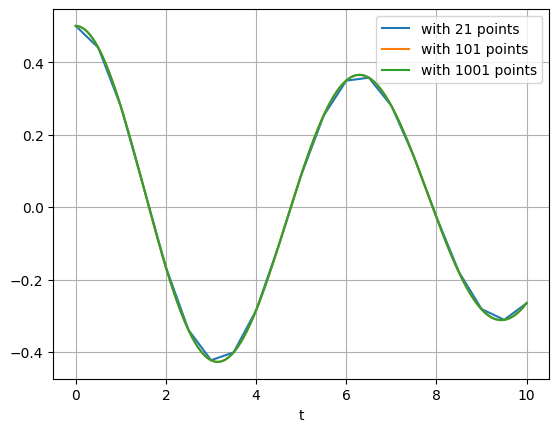

In [30]:
plt.plot(t4, sol4[:, 0], label='with 21 points')
plt.plot(t, sol[:, 0], label='with 101 points')
plt.plot(t2, sol2[:, 0], label='with 1001 points')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

----
## Comparisons

In [31]:
methods = [odeint, rungekutta1, rungekutta2, rungekutta4]
markers = ['+', 'o', 's', '>']

In [32]:
def test_1(n=101):
    t = np.linspace(0, 10, n)
    for method, m in zip(methods, markers):
        sol = method(pend, y_init, t, args=(b, c))
        plt.plot(t, sol[:, 0], label=method.__name__, marker=m)
    plt.legend(loc='best')
    plt.title("Comparison of different ODE integration methods for $n={}$ points".format(n))
    plt.xlabel("$t = [0, 10]$")
    plt.grid()
    plt.show()

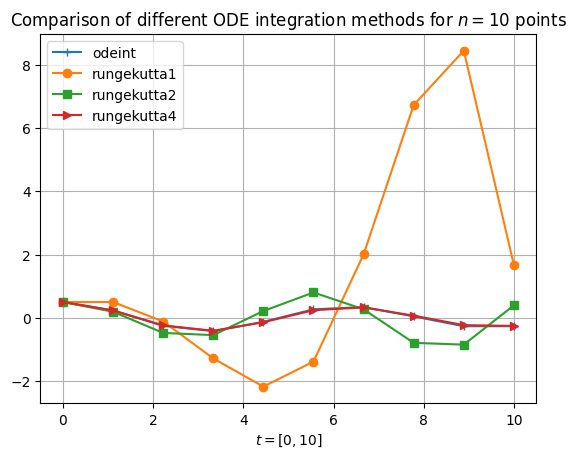

In [33]:
test_1(10)

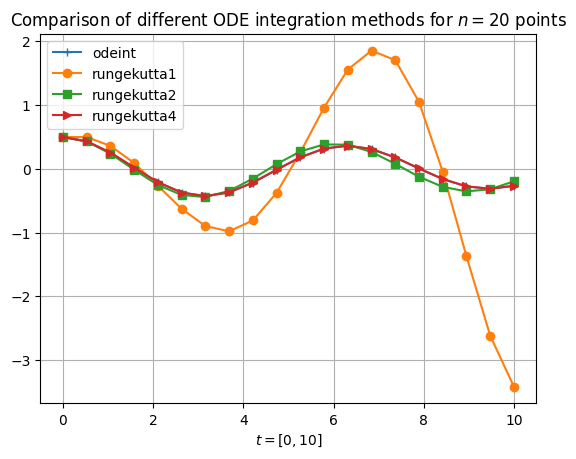

In [34]:
test_1(20)

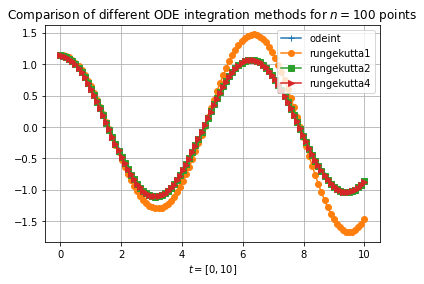

In [ ]:
test_1(100)

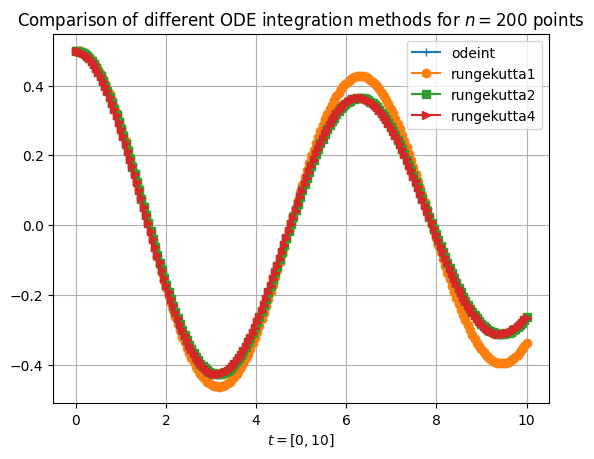

In [35]:
test_1(200)

## Comparisons on another integration problem

Consider the following ODE on $t\in[0, 1]$:
$$
\begin{cases}
 y'''(t) = 12 y(t)^{4/5} + \cos(y'(t))^3 - \sin(y''(t)) \\
 y(0) = 0, y'(0) = 1, y''(0) = 0.1
\end{cases}
$$

It can be written in a vectorial form like the first one:

In [36]:
def f(y, t):
    return np.array([y[1], y[2], 12 * y[0] ** (4/5.) + np.cos(y[1])**3 - np.sin(y[2])])

In [37]:
def test_2(n=101):
    t = np.linspace(0, 1, n)
    y0 = np.array([0, 1, 0.1])
    for method, m in zip(methods, markers):
        sol = method(f, y0, t)
        plt.plot(t, sol[:, 0], label=method.__name__, marker=m)
    plt.legend(loc='best')
    plt.title("Comparison of different ODE integration methods for $n={}$ points".format(n))
    plt.xlabel("$t = [0, 1]$")
    plt.grid()
    plt.show()

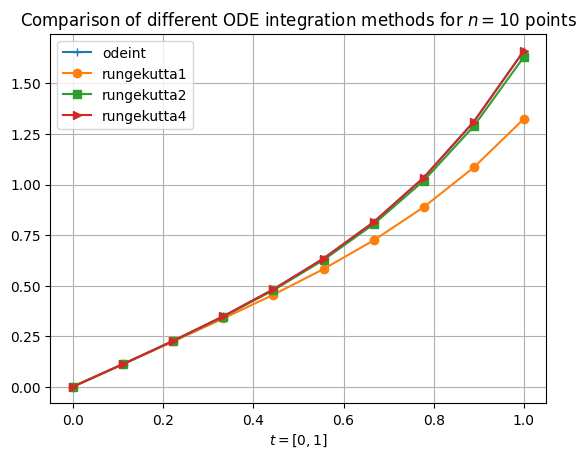

In [38]:
test_2(10)

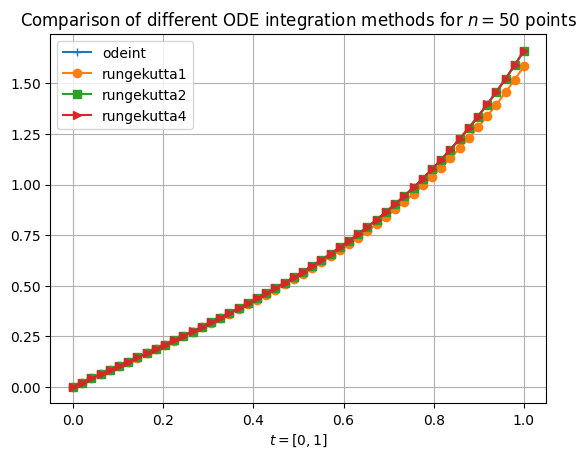

In [39]:
test_2(50)

Consider the following ODE on $t\in[0, 3]$:
$$
\begin{cases}
 y''''(t) = y(t)^{-5/3} \\
 y(0) = 10, y'(0) = -3, y''(0) = 1, y'''(0) = 1
\end{cases}
$$

It can be written in a vectorial form like the first one:

In [40]:
def f(y, t):
    return np.array([y[1], y[2], y[3], y[0]**(-5/3.)])

In [41]:
def test_3(n=101):
    t = np.linspace(0, 3, n)
    y0 = np.array([10, -3, 1, 1])
    for method, m in zip(methods, markers):
        sol = method(f, y0, t)
        plt.plot(t, sol[:, 0], label=method.__name__, marker=m)
    plt.legend(loc='best')
    plt.title("Comparison of different ODE integration methods for $n={}$ points".format(n))
    plt.xlabel("$t = [0, 1]$")
    plt.grid()
    plt.show()

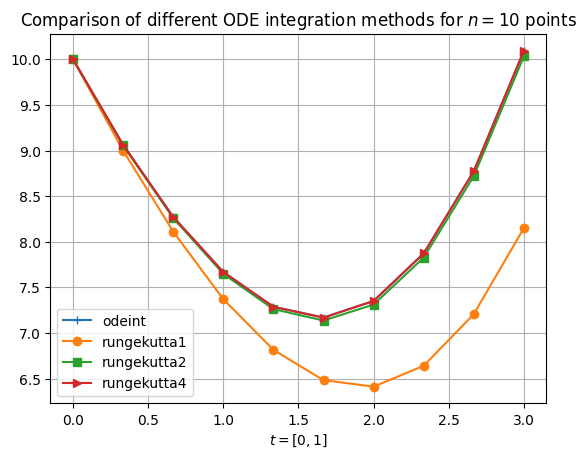

In [42]:
test_3(10)

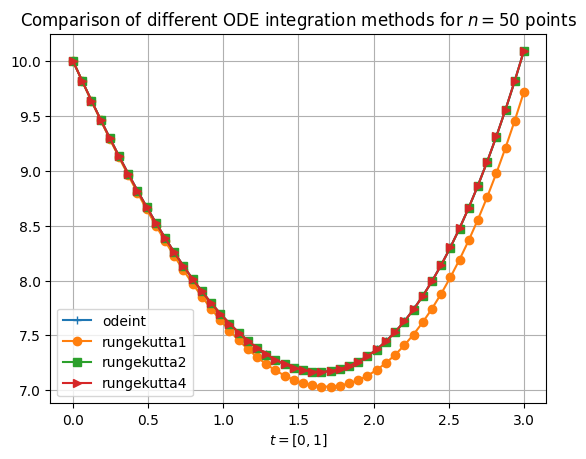

In [43]:
test_3(50)

Our hand-written Runge-Kutta method of order 4 seems to be as efficient as the `odeint` method from `scipy`... and that's because `odeint` basically uses a Runge-Kutta method of order 4 (with smart variants).

## Small benchmark
We can also compare their speed:

In [44]:
methods = [odeint, rungekutta1, rungekutta2, rungekutta4]

y0 = np.array([10, -3, 1, 1])
for n in [20, 100, 1000]:
    print("\n")
    t = np.linspace(0, 3, n)
    for method in methods:
        print("Time of solving this ODE for {} points with {} method...".format(n, method.__name__))
        %timeit sol = method(f, y0, t)



Time of solving this ODE for 20 points with odeint method...
117 μs ± 2.66 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time of solving this ODE for 20 points with rungekutta1 method...
64.8 μs ± 2.63 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time of solving this ODE for 20 points with rungekutta2 method...
135 μs ± 4.81 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time of solving this ODE for 20 points with rungekutta4 method...
346 μs ± 27 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Time of solving this ODE for 100 points with odeint method...
128 μs ± 3.92 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time of solving this ODE for 100 points with rungekutta1 method...
333 μs ± 5.09 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Time of solving this ODE for 100 points with rungekutta2 method...
738 μs ± 30.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Time of solving this ODE fo

- Well, that's disappointing, the Numba Jit version was NOT faster than the manual implementation...
- The order 1 method is simpler and so faster than the order 2, which itself is simpler and faster than the order 4 method.
- And we can check that the SciPy implementation is much faster than our manual implentations!